<a href="https://colab.research.google.com/github/Chunshan-Theta/mandarin_intent_classify/blob/main/examples/Doc2Vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# zh dateset process

In [ ]:
# 下載wiki資料
import urllib.request
import progressbar
# https://dumps.wikimedia.org/zhwiki/latest/ 可以在這裡找到其他檔案
url = "https://dumps.wikimedia.org/zhwiki/latest/zhwiki-latest-pages-meta-current1.xml-p1p187712.bz2"
url = "https://dumps.wikimedia.org/zhwiki/latest/zhwiki-latest-pages-articles1.xml-p1p187712.bz2"
filename = "zhwiki-latest-pages-meta-current1.xml.bz2"
pbar = None
def show_progress(block_num, block_size, total_size):
    global pbar
    if pbar is None:
        pbar = progressbar.ProgressBar(maxval=total_size)
        pbar.start()

    downloaded = block_num * block_size
    if downloaded < total_size:
        pbar.update(downloaded)
    else:
        pbar.finish()
        pbar = None

data = urllib.request.urlretrieve(url=url,filename=filename,reporthook=show_progress)

100% (200806036 of 200806036) |##########| Elapsed Time: 0:00:41 Time:  0:00:41


In [ ]:
# 處理wiki文章
import logging
import sys
import warnings
warnings.filterwarnings(action ='ignore', category = UserWarning, module = 'gensim')
from gensim.corpora import WikiCorpus

# 將 wiki 資料集載下後進行 xml convert to txt 
class Wiki_to_txt(object):

    def __init__(self):
        # 用默認 Formatter 為日誌系統建立一個 StreamHandler ，設置基礎配置並加到 root logger 中
        logging.basicConfig(format = '%(asctime)s : %(levelname)s : %(message)s', level = logging.INFO)

    # 使用方法 https://radimrehurek.com/gensim/corpora/wikicorpus.html
    def set_wiki_to_txt(self, wiki_data_path = None):
        if wiki_data_path == None:
            # 系統下參數
            if len(sys.argv) != 2:
                print("Please Usage: python3 " + sys.argv[0] + " wiki_data_path")
                exit()
            else:
                wiki_corpus = WikiCorpus(sys.argv[1], dictionary = {})
        else:
            wiki_corpus = WikiCorpus(wiki_data_path, dictionary = {})
        # wiki.xml convert to wiki.txt
        with open("wiki_text.txt", 'w', encoding = 'utf-8') as output:
            text_count = 0
            
            for text in wiki_corpus.get_texts():
                # save use string(gensim)
                output.write(' '.join(text) + '\n')
                text_count += 1
                if text_count % 1000 == 0:
                    print(f"目前已處理 {text_count} 篇文章")
            print("轉檔完畢!")
            
if __name__ == "__main__":
    wiki_to_txt = Wiki_to_txt()
    # 將 wiki xml 轉換成 wiki txt
    wiki_to_txt.set_wiki_to_txt(filename)

目前已處理 1000 篇文章
目前已處理 2000 篇文章
目前已處理 3000 篇文章
目前已處理 4000 篇文章
目前已處理 5000 篇文章
目前已處理 6000 篇文章
目前已處理 7000 篇文章
目前已處理 8000 篇文章
目前已處理 9000 篇文章
目前已處理 10000 篇文章
目前已處理 11000 篇文章
目前已處理 12000 篇文章
目前已處理 13000 篇文章
目前已處理 14000 篇文章
目前已處理 15000 篇文章
目前已處理 16000 篇文章
目前已處理 17000 篇文章
目前已處理 18000 篇文章
目前已處理 19000 篇文章
目前已處理 20000 篇文章
目前已處理 21000 篇文章
目前已處理 22000 篇文章
目前已處理 23000 篇文章
目前已處理 24000 篇文章
目前已處理 25000 篇文章
目前已處理 26000 篇文章
目前已處理 27000 篇文章
目前已處理 28000 篇文章
目前已處理 29000 篇文章
目前已處理 30000 篇文章
目前已處理 31000 篇文章


2021-02-25 01:37:44,541 : INFO : finished iterating over Wikipedia corpus of 31626 documents with 11448587 positions (total 86064 articles, 11827400 positions before pruning articles shorter than 50 words)


轉檔完畢!


### 安裝簡體繁體轉換模組

In [ ]:
!pip install hanziconv
!pip install pypinyin

### 處理文字內容


1.   簡繁轉換
2.   斷詞斷字/轉換拼音
3.   刪除停用字



In [ ]:
# -*- coding: utf-8 -*-
import jieba
import logging
from hanziconv import HanziConv
import urllib.request
from pypinyin import lazy_pinyin,Style


ENV_simplified_to_traditional = False
ENV_lazy_pinyin = True
ENV_lazy_pinyin_style=Style.TONE3


# 進行斷詞並過濾 stopword
class Segmentation(object):

    def __init__(self):
        # 用默認 Formatter 為日誌系統建立一個 StreamHandler ，設置基礎配置並加到 root logger 中
        logging.basicConfig(format = "%(asctime)s : %(levelname)s : %(message)s", level = logging.INFO)
        self.stopwordset = set()
        
    # 讀取 stopword 辭典，並存到 stopwordset
    def set_stopword(self):
        stopwords_url ="https://raw.githubusercontent.com/Alex-CHUN-YU/Word2vec/master/stopwords.txt" # it's a file like object and works just like a file
        for line in urllib.request.urlopen(stopwords_url):
            self.stopwordset.add(line.decode("utf-8").strip("\n"))
        #print(self.stopwordset)
        print("StopWord Set 已儲存!")

    # 簡 to 繁
    def simplified_to_traditional(self):
        logging.info("等待中..(簡 to 繁)")
        traditional = open("traditional.txt", "w", encoding = "utf-8")
        with open("wiki_text.txt", "r", encoding = "utf-8") as simplified:
            simplifiedData = list(simplified)
            idx = 0
            for s in simplifiedData:
                if ENV_simplified_to_traditional:
                    traditional.write(HanziConv.toTraditional(s))
                else:
                    traditional.write(s)
                idx +=1
                if idx % 1000 == 0:
                    print(f"{idx} /{len(simplifiedData)}篇文章已成功簡體轉繁體")
        print("成功簡體轉繁體!")
        traditional.close()

    # 斷詞(Segmentation)並過濾掉停用詞(Stop Word) 
    def segmentation(self):
        logging.info("等待中..(jieba 斷詞，並過濾停用詞)")
        segmentation = open("segmentation.txt", "w", encoding = "utf-8")
        with open("traditional.txt", "r", encoding = "utf-8") as Corpus:
            CorpusData = list(Corpus)
            for idx, sentence in enumerate(CorpusData):
                sentence = sentence.strip("\n")
                pos = jieba.cut(sentence, cut_all = False)
                for term in pos:
                    if term not in self.stopwordset:
                        if ENV_lazy_pinyin:
                            term_pinyin = "".join(lazy_pinyin(term,style=ENV_lazy_pinyin_style))
                            segmentation.write(term_pinyin + " ")
                        else:
                            segmentation.write(term + " ")
                segmentation.write("\n")
                if idx % 100 == 0:
                    print(f"{idx}/ {len(CorpusData)}篇文章已 jieba 斷詞完畢，並完成過濾停用詞!")
        print("全部篇文章已jieba 斷詞完畢，並已完成過濾停用詞!")
        segmentation.close()

    # 斷詞(Segmentation)並過濾掉停用詞(Stop Word)
    @staticmethod
    def CorpusSegmentation(Corpus,stopwordset):
        formattedCorpus = []
        for sentence in Corpus:
            if ENV_simplified_to_traditional:
                sentence = HanziConv.toTraditional(sentence.strip("\n"))
            else:
                sentence = sentence.strip("\n")
            pos = jieba.cut(sentence, cut_all = False)
            sentence = ""
            for term in pos:
                if term not in stopwordset:
                    if ENV_lazy_pinyin:
                        term_pinyin = "".join(lazy_pinyin(term,style=ENV_lazy_pinyin_style))
                        sentence += (term_pinyin + " ")
                    else:
                        sentence += (term + " ")
            formattedCorpus.append(sentence)
        return formattedCorpus

In [ ]:
if __name__ == "__main__":
    segmentation = Segmentation()
    # 讀取停用詞辭典
    segmentation.set_stopword()
    # data 進行簡體轉繁體
    segmentation.simplified_to_traditional()
    # 進行 jieba 斷詞同步過濾停用詞，並產生辭典
    segmentation.segmentation()

2021-02-25 01:40:53,703 : INFO : 等待中..(簡 to 繁)


StopWord Set 已儲存!
1000 /31626篇文章已成功簡體轉繁體
2000 /31626篇文章已成功簡體轉繁體
3000 /31626篇文章已成功簡體轉繁體
4000 /31626篇文章已成功簡體轉繁體
5000 /31626篇文章已成功簡體轉繁體
6000 /31626篇文章已成功簡體轉繁體
7000 /31626篇文章已成功簡體轉繁體
8000 /31626篇文章已成功簡體轉繁體
9000 /31626篇文章已成功簡體轉繁體
10000 /31626篇文章已成功簡體轉繁體
11000 /31626篇文章已成功簡體轉繁體
12000 /31626篇文章已成功簡體轉繁體
13000 /31626篇文章已成功簡體轉繁體
14000 /31626篇文章已成功簡體轉繁體
15000 /31626篇文章已成功簡體轉繁體
16000 /31626篇文章已成功簡體轉繁體
17000 /31626篇文章已成功簡體轉繁體
18000 /31626篇文章已成功簡體轉繁體
19000 /31626篇文章已成功簡體轉繁體
20000 /31626篇文章已成功簡體轉繁體
21000 /31626篇文章已成功簡體轉繁體
22000 /31626篇文章已成功簡體轉繁體
23000 /31626篇文章已成功簡體轉繁體
24000 /31626篇文章已成功簡體轉繁體
25000 /31626篇文章已成功簡體轉繁體
26000 /31626篇文章已成功簡體轉繁體
27000 /31626篇文章已成功簡體轉繁體
28000 /31626篇文章已成功簡體轉繁體
29000 /31626篇文章已成功簡體轉繁體
30000 /31626篇文章已成功簡體轉繁體
31000 /31626篇文章已成功簡體轉繁體
成功簡體轉繁體!


2021-02-25 01:40:55,258 : INFO : 等待中..(jieba 斷詞，並過濾停用詞)


0/ 31626篇文章已 jieba 斷詞完畢，並完成過濾停用詞!
100/ 31626篇文章已 jieba 斷詞完畢，並完成過濾停用詞!
200/ 31626篇文章已 jieba 斷詞完畢，並完成過濾停用詞!
300/ 31626篇文章已 jieba 斷詞完畢，並完成過濾停用詞!
400/ 31626篇文章已 jieba 斷詞完畢，並完成過濾停用詞!
500/ 31626篇文章已 jieba 斷詞完畢，並完成過濾停用詞!
600/ 31626篇文章已 jieba 斷詞完畢，並完成過濾停用詞!
700/ 31626篇文章已 jieba 斷詞完畢，並完成過濾停用詞!
800/ 31626篇文章已 jieba 斷詞完畢，並完成過濾停用詞!
900/ 31626篇文章已 jieba 斷詞完畢，並完成過濾停用詞!
1000/ 31626篇文章已 jieba 斷詞完畢，並完成過濾停用詞!
1100/ 31626篇文章已 jieba 斷詞完畢，並完成過濾停用詞!
1200/ 31626篇文章已 jieba 斷詞完畢，並完成過濾停用詞!
1300/ 31626篇文章已 jieba 斷詞完畢，並完成過濾停用詞!
1400/ 31626篇文章已 jieba 斷詞完畢，並完成過濾停用詞!
1500/ 31626篇文章已 jieba 斷詞完畢，並完成過濾停用詞!
1600/ 31626篇文章已 jieba 斷詞完畢，並完成過濾停用詞!
1700/ 31626篇文章已 jieba 斷詞完畢，並完成過濾停用詞!
1800/ 31626篇文章已 jieba 斷詞完畢，並完成過濾停用詞!
1900/ 31626篇文章已 jieba 斷詞完畢，並完成過濾停用詞!
2000/ 31626篇文章已 jieba 斷詞完畢，並完成過濾停用詞!
2100/ 31626篇文章已 jieba 斷詞完畢，並完成過濾停用詞!
2200/ 31626篇文章已 jieba 斷詞完畢，並完成過濾停用詞!
2300/ 31626篇文章已 jieba 斷詞完畢，並完成過濾停用詞!
2400/ 31626篇文章已 jieba 斷詞完畢，並完成過濾停用詞!
2500/ 31626篇文章已 jieba 斷詞完畢，並完成過濾停用詞!
2600/ 31626篇文章已 jieba 斷詞完畢，並完成過濾停用詞!
2700/ 31626篇文

# Doc2Word

In [ ]:
# 取出訓練用資料
import random
raw_texts = []
common_texts = []
train_sample_count = 10000

#
with open("segmentation.txt") as f:
    line = f.readline()
    ## 用 while 逐行讀取檔案內容，直至檔案結尾
    while line:
        raw_texts.append(line)
        line = f.readline()

raw_texts = random.sample(raw_texts, train_sample_count)
for r in raw_texts:
    common_texts.append([t  for t in r.split(" ") if len(t)>0])

raw_doc = []
for sent in common_texts:
    raw_doc.append(" ".join(sent))




In [ ]:
# 訓練Doc2Vec
import sys
import json
from gensim.models import doc2vec
from collections import namedtuple
from gensim.models.doc2vec import TaggedDocument

# Load data
# raw_doc = [
#     'Today is a nice day',
#     'I want to go to play'
# ]


# Preprocess
docs = []
for index, text in enumerate(raw_doc):
    words = text.split()
    docs.append(TaggedDocument(words, [index]))

# Train
model = doc2vec.Doc2Vec(docs, vector_size=300, window=30, min_count=1,epochs=5, workers=4, dm=1)


# Save
model.save('doc2vec.model')

2021-02-25 02:14:51,757 : INFO : collecting all words and their counts
2021-02-25 02:14:51,759 : INFO : PROGRESS: at example #0, processed 0 words (0/s), 0 word types, 0 tags
2021-02-25 02:14:54,517 : INFO : collected 623221 word types and 10000 unique tags from a corpus of 10000 examples and 8690237 words
2021-02-25 02:14:54,519 : INFO : Loading a fresh vocabulary
2021-02-25 02:14:57,637 : INFO : effective_min_count=1 retains 623221 unique words (100% of original 623221, drops 0)
2021-02-25 02:14:57,638 : INFO : effective_min_count=1 leaves 8690237 word corpus (100% of original 8690237, drops 0)
2021-02-25 02:14:59,743 : INFO : deleting the raw counts dictionary of 623221 items
2021-02-25 02:14:59,759 : INFO : sample=0.001 downsamples 5 most-common words
2021-02-25 02:14:59,760 : INFO : downsampling leaves estimated 8612309 word corpus (99.1% of prior 8690237)
2021-02-25 02:15:02,142 : INFO : estimated required memory for 623221 words and 300 dimensions: 1819340900 bytes
2021-02-25 02

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

#
model_d2v = doc2vec.Doc2Vec.load('doc2vec.model')
def infer(t):
    exp_sent_1_doc = word_tokenize(t)
    vec_sent_1_d2v = model_d2v.infer_vector(exp_sent_1_doc)
    return vec_sent_1_d2v

samples = Segmentation.CorpusSegmentation(['台股 ETF 安心 存 年輕人 買 0050 退休族 買 0056'],segmentation.stopwordset)
print(samples)
print(infer(samples[0]))
# print(infer('投資 三 步驟 小資女 艾蜜莉 超 完整 解答'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


2021-02-25 02:22:31,267 : INFO : loading Doc2Vec object from doc2vec.model
2021-02-25 02:22:34,092 : INFO : loading vocabulary recursively from doc2vec.model.vocabulary.* with mmap=None
2021-02-25 02:22:34,093 : INFO : loading trainables recursively from doc2vec.model.trainables.* with mmap=None
2021-02-25 02:22:34,095 : INFO : loading syn1neg from doc2vec.model.trainables.syn1neg.npy with mmap=None
2021-02-25 02:22:34,497 : INFO : loading wv recursively from doc2vec.model.wv.* with mmap=None
2021-02-25 02:22:34,498 : INFO : loading vectors from doc2vec.model.wv.vectors.npy with mmap=None
2021-02-25 02:22:34,855 : INFO : loading docvecs recursively from doc2vec.model.docvecs.* with mmap=None
2021-02-25 02:22:34,858 : INFO : loaded doc2vec.model


['tai2gu3   ETF   an1xin1   cun2   nian2 qing1ren2   mai3   0050   tui4xiu1 zu2   mai3   0056 ']
[-6.22728490e-04 -1.51599925e-02 -1.25794252e-02 -1.22652138e-02
  1.22086285e-03 -5.94400708e-03 -7.01450510e-03 -1.46964025e-02
 -4.04376024e-03  1.15270866e-03 -1.21431332e-02 -1.19165343e-03
  3.20062297e-03  4.85317735e-03 -8.74219742e-03 -1.82790160e-02
  2.71358702e-04  1.75493199e-03  1.29110133e-02 -3.53239663e-03
  2.51574181e-02  1.16504403e-03  7.70347612e-03 -7.75959285e-04
  2.58659525e-03 -3.15484940e-03 -6.16303273e-03  1.91170592e-02
  7.56954728e-03 -5.52039966e-03 -9.19556711e-03  1.90279055e-02
  1.46952376e-03  4.47596656e-03 -1.04577318e-02  8.63222685e-03
 -8.74827616e-03  1.34371677e-02 -1.69860513e-03 -8.37106258e-03
  1.41615542e-02  2.58624516e-02  1.81873906e-02 -8.32892474e-05
 -1.41493892e-02  1.39986882e-02 -7.74089806e-03 -1.02750231e-02
  8.47512390e-03 -1.30289812e-02  6.10406743e-03 -7.20607862e-03
 -3.37299937e-03 -7.26074306e-03  2.80055427e-03  1.200731

# KMeans 分群

In [ ]:
import random
points =[]
point_text =[]
samples = random.sample(raw_texts, 15)
samples=[
  '綠能指的是在生產電力的過程中，它的二氧化碳排放量為零或趨近於零，因相較於其他方式（如火力發電、過度發展之再生能源）所生產之電力，對於環境衝擊影響較低。', 
  '綠電的主要來源為太陽能、風力、水力、生質能、地熱等，中華民國主要以太陽能及風力為主。', 
  '由可再生能源發電設備生產的電力，就是綠色電力。', 
  '台電副總經理李鴻洲說，目前台電一年總供電量為1990億度，綠電供電量占台電總供電量3.6％，其中太陽能光電為2.5億度、風力發電為14億度。', 
  '由於台灣反核高漲，政府因應國內資訊業與民眾對綠電需求實行綠色電價銷售制度。',
  '神经质反映个体情感调节过程，反映个体体验消极情绪的倾向和情绪不稳定性。高神经质个体倾向于有心理压力，不现实的想法、过多的要求和冲动',
  '更容易体验到诸如愤怒、焦虑、抑郁等消极的情绪。他们对外界刺激反应比一般人强烈，对情绪的调节、应对能力比较差，经常处于一种不良的情绪状态下。',
  '并且这些人思维、决策、以及有效应对外部压力的能力比较差。相反，神经质维度得分低的人较少烦恼，较少情绪化，比较平静。神经质有六个子维度，对于每个子维度都有一些说明性的形容词。',
  '焦虑的个体忧虑、恐惧、容易担忧、紧张、神经过敏。得高分的人更可能有自由浮动的焦虑和恐惧。低分的人则是平静的、放松的。他们不会总是担心事情可能会出问题。',
  '焦虑，容易感觉到危险和威胁，容易紧张、恐惧、担忧、不安。相反心态平静，放松，不容易感到害怕，不会总是担心事情可能会出问题，情绪平静、放松、稳定。',
  '公幼及非營利幼兒園的到校時間為早上7點30分7點50分放學時間為下午4點30分',
  '幼儿园又称幼稚园，是給學齡前兒童的培育設施，屬於一種學前教育機構。在部分地区，幼儿园是国民教育学制的一部分。',
  '兒童在幼儿园学习适合他们年龄的生活环境知识经验及生活常识，以及学习习惯和生活习惯等。',
  '私幼和非營利幼兒園都沒有寒暑假但公幼有公幼一般都是9月1日開學6月30日結束整學年的課程寒假放4週由各園所自訂時間',
  '幼儿园招收3-5岁的儿童，进行初步的教育，但以游戏为主。由于在中国大陆，许多家庭夫妻双方都参加工作，所以也有招收1-3岁儿童的托儿所。由于小学控制入学年龄，一般小学和幼儿园也办学前班，招收5岁以上但不到6周岁入学年龄的儿童，作为适应学校生活的过渡。'
]


print(samples)

point_text = [" ".join(jieba.cut(li, cut_all = False)) for li in samples.copy()]
samples = Segmentation.CorpusSegmentation(samples,segmentation.stopwordset)

for r in samples:
    point = infer(r)
    points.append(point)

['綠能指的是在生產電力的過程中，它的二氧化碳排放量為零或趨近於零，因相較於其他方式（如火力發電、過度發展之再生能源）所生產之電力，對於環境衝擊影響較低。', '綠電的主要來源為太陽能、風力、水力、生質能、地熱等，中華民國主要以太陽能及風力為主。', '由可再生能源發電設備生產的電力，就是綠色電力。', '台電副總經理李鴻洲說，目前台電一年總供電量為1990億度，綠電供電量占台電總供電量3.6％，其中太陽能光電為2.5億度、風力發電為14億度。', '由於台灣反核高漲，政府因應國內資訊業與民眾對綠電需求實行綠色電價銷售制度。', '神经质反映个体情感调节过程，反映个体体验消极情绪的倾向和情绪不稳定性。高神经质个体倾向于有心理压力，不现实的想法、过多的要求和冲动', '更容易体验到诸如愤怒、焦虑、抑郁等消极的情绪。他们对外界刺激反应比一般人强烈，对情绪的调节、应对能力比较差，经常处于一种不良的情绪状态下。', '并且这些人思维、决策、以及有效应对外部压力的能力比较差。相反，神经质维度得分低的人较少烦恼，较少情绪化，比较平静。神经质有六个子维度，对于每个子维度都有一些说明性的形容词。', '焦虑的个体忧虑、恐惧、容易担忧、紧张、神经过敏。得高分的人更可能有自由浮动的焦虑和恐惧。低分的人则是平静的、放松的。他们不会总是担心事情可能会出问题。', '焦虑，容易感觉到危险和威胁，容易紧张、恐惧、担忧、不安。相反心态平静，放松，不容易感到害怕，不会总是担心事情可能会出问题，情绪平静、放松、稳定。', '公幼及非營利幼兒園的到校時間為早上7點30分7點50分放學時間為下午4點30分', '幼儿园又称幼稚园，是給學齡前兒童的培育設施，屬於一種學前教育機構。在部分地区，幼儿园是国民教育学制的一部分。', '兒童在幼儿园学习适合他们年龄的生活环境知识经验及生活常识，以及学习习惯和生活习惯等。', '私幼和非營利幼兒園都沒有寒暑假但公幼有公幼一般都是9月1日開學6月30日結束整學年的課程寒假放4週由各園所自訂時間', '幼儿园招收3-5岁的儿童，进行初步的教育，但以游戏为主。由于在中国大陆，许多家庭夫妻双方都参加工作，所以也有招收1-3岁儿童的托儿所。由于小学控制入学年龄，一般小学和幼儿园也办学前班，招收5岁以上但不到6周岁入学年龄的儿童，作为适应学校生活的过渡。']


In [ ]:
from sklearn import cluster, datasets
from hanziconv import HanziConv

n_clusters = 2
# KMeans 演算法
kmeans_fit = cluster.KMeans(n_clusters = n_clusters).fit(points)

# 印出分群結果
cluster_labels = kmeans_fit.labels_
print("分群結果：")
print(cluster_labels)
print("---")
result = {} 
for l,t in zip(cluster_labels,point_text):
    print(l,t)
    if l not in result:
        result[l] = ""
    result[l]+=HanziConv.toTraditional(t)
print(result)

分群結果：
[1 1 1 1 1 1 0 1 0 0 1 1 0 1 1]
---
1 綠能 指 的 是 在 生產電力 的 過程 中 ， 它 的 二氧化碳 排放量 為 零 或 趨近 於 零 ， 因相較 於 其他 方式 （ 如 火力 發電 、 過度 發展 之 再生能源 ） 所生產 之 電力 ， 對 於 環境 衝擊 影響 較 低 。
1 綠電 的 主要 來源 為 太陽能 、 風力 、 水力 、 生質 能 、 地熱 等 ， 中華民國 主要 以太 陽能 及 風力 為 主 。
1 由 可 再生能源 發電 設備 生產 的 電力 ， 就是 綠色 電力 。
1 台電 副 總經理 李鴻洲 說 ， 目前 台電 一年 總供 電量 為 1990 億度 ， 綠電供 電量 占 台電 總供 電量 3.6 ％ ， 其中 太陽能 光電為 2.5 億度 、 風力 發電為 14 億度 。
1 由 於 台灣 反核 高漲 ， 政府 因應 國內 資訊業 與 民眾 對 綠電 需求 實行 綠色 電價 銷售 制度 。
1 神经质 反映 个体 情感 调节 过程 ， 反映 个体 体验 消极情绪 的 倾向 和 情绪 不稳定性 。 高 神经质 个体 倾向 于 有 心理压力 ， 不 现实 的 想法 、 过多 的 要求 和 冲动
0 更 容易 体验 到 诸如 愤怒 、 焦虑 、 抑郁 等 消极 的 情绪 。 他们 对 外界 刺激 反应 比 一般 人 强烈 ， 对 情绪 的 调节 、 应对 能力 比较 差 ， 经常 处于 一种 不良 的 情绪 状态 下 。
1 并且 这些 人 思维 、 决策 、 以及 有 效应 对外部 压力 的 能力 比较 差 。 相反 ， 神经质 维度 得分 低 的 人 较 少 烦恼 ， 较 少 情绪化 ， 比较 平静 。 神经质 有 六个 子 维度 ， 对于 每个 子 维度 都 有 一些 说明性 的 形容词 。
0 焦虑 的 个体 忧虑 、 恐惧 、 容易 担忧 、 紧张 、 神经过敏 。 得 高分 的 人 更 可能 有 自由 浮动 的 焦虑 和 恐惧 。 低分 的 人 则 是 平静 的 、 放松 的 。 他们 不会 总是 担心 事情 可能 会出 问题 。
0 焦虑 ， 容易 感觉 到 危险 和 威胁 ， 容易 紧张 、 恐惧 、 担忧 、 不安 。 相反 心态 平静 ， 放松 ， 不 容易 感到 害怕 ，

# 文字雲

In [ ]:
#下載中文字體
import urllib.request
url = "https://fonts.google.com/download?family=Noto%20Sans%20TC"
filename = "font.zip"

data = urllib.request.urlretrieve(url=url,filename=filename)

import os
import zipfile
file_path = f"./{filename}"
# zipfile example
def zip_list(file_path):
    zf = zipfile.ZipFile(file_path, 'r')
    zf.extractall()

zip_list(file_path)

In [ ]:
# -*- coding: utf-8 -*-
import nltk
from wordcloud import WordCloud

def make_pic(data,filename):
    cloud = WordCloud(
        font_path="./NotoSansTC-Thin.otf"
    ).generate(data)
    cloud.to_file(filename)

for idx in range(n_clusters):
  make_pic(result[idx],f'output_{idx}.png')

### 分群結果

#### 相同群數 3 -> 3

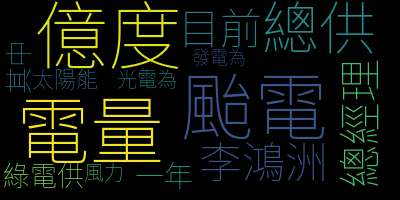

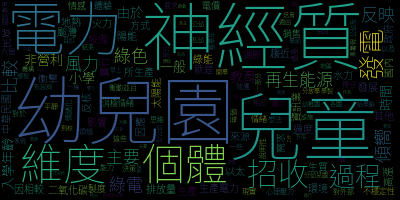

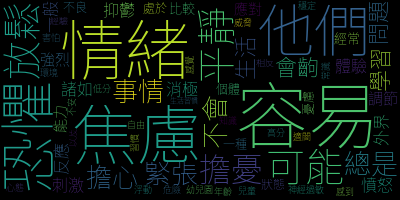

#### 過於細分 3 -> 5

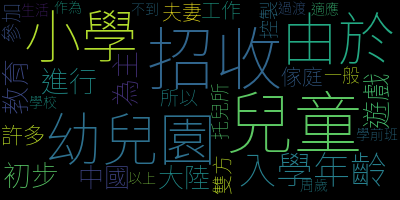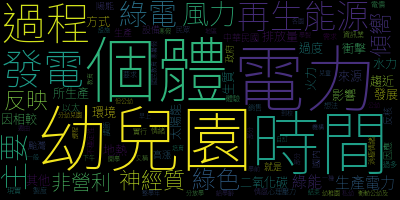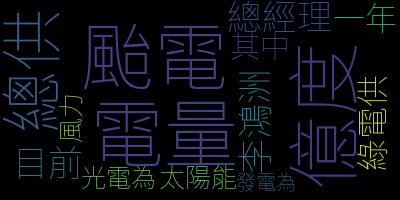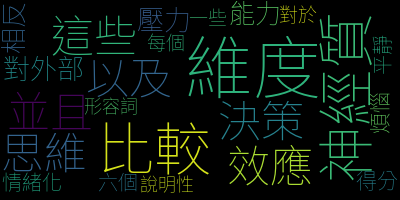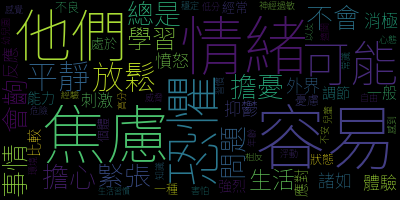

#### 過於粗分 3 -> 2


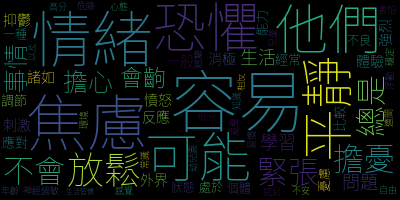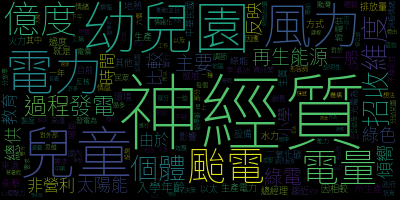